In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('/content/YourCabs_training (1) (2) (1).csv')
df.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [3]:
df.shape

(43431, 20)

In [4]:
df.dtypes

id                       int64
user_id                  int64
vehicle_model_id         int64
package_id             float64
travel_type_id           int64
from_area_id           float64
to_area_id             float64
from_city_id           float64
to_city_id             float64
from_date               object
to_date                float64
online_booking           int64
mobile_site_booking      int64
booking_created         object
from_lat               float64
from_long              float64
to_lat                 float64
to_long                float64
Car_Cancellation         int64
Cost_of_error          float64
dtype: object

In [5]:
df.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
Cost_of_error              0
dtype: int64

In [6]:
mean1 = df["from_lat"].mean()
mean2 = df["from_long"].mean()
mean3 = df["to_lat"].mean()
mean4 = df["to_long"].mean()

In [7]:
# filling with there means in place of null
df.from_lat.fillna(mean1,inplace=True)
df.from_long.fillna(mean2,inplace=True)
df.to_lat.fillna(mean3,inplace=True)
df.to_long.fillna(mean4,inplace=True)

In [8]:
# droping those features which are not required (columns with either null values or with all unique values)
df.drop(['id','user_id','to_area_id','from_area_id','package_id','from_city_id', 'to_city_id','to_date'],inplace=True,axis=1)
df.head()

,vehicle_model_id,travel_type_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,28,2,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,12,2,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,12,2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,12,2,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,12,2,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [ ]:
# finding the time difference between booking created and requested trip start time.

In [9]:
# for from_date feature
trip_strt=np.array(df['from_date'])
trip_strt=trip_strt.astype('str')

In [10]:
# splitting into date and time
date=[]
for j in trip_strt:
    date.append(j.split()[0])

time=[]
for i in trip_strt:
    time.append(i.split()[1])

In [11]:
# splitting date into day, month and year
day=[]
month=[]
year=[]
for q in date:
    day.append(q.split('/')[1])
    month.append(q.split('/')[0])
    year.append(q.split('/')[2])

# splitting time into hours and minutes
time_hours=[]
time_minutes=[]
for w in time:
    time_hours.append(w.split(':')[0])
    time_minutes.append(w.split(':')[1])

In [12]:
# for booking_created feature
booking=np.array(df['booking_created'])
booking=booking.astype('str')

In [13]:
# splitting into date and time
booking_date=[]
for j in booking:
    booking_date.append(j.split()[0])
booking_time=[]
for i in booking:
    booking_time.append(i.split()[1])

In [14]:
# splitting date into day, month and year
booking_day=[]
booking_month=[]
booking_year=[]
for q in booking_date:
    booking_day.append(q.split('/')[1])
    booking_month.append(q.split('/')[0])
    booking_year.append(q.split('/')[2])

# splitting time into hours and minutes
bookingtime_hours=[]
bookingtime_minutes=[]
for w in booking_time:
    bookingtime_hours.append(w.split(':')[0])
    bookingtime_minutes.append(w.split(':')[1])

In [15]:
len(bookingtime_hours)

43431

In [16]:
# subtraction of date and time of booking created from requested trip start time
from datetime import datetime
diff_days=[]
diff_time=[]
bookingdate=[]
tripdate=[]
for i in range(43431):
    bookingdate.append(datetime(int(booking_year[i]),int(booking_month[i]),int(booking_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    tripdate.append(datetime(int(year[i]),int(month[i]),int(day[i]),int(time_hours[i]),int(time_minutes[i])))
    diff  = tripdate[i] - bookingdate[i]
    days, seconds = diff.days, diff.seconds
    diff_days.append(days)
    diff_time.append(float('%.2f'%(seconds/86400)))

In [17]:
diff_days= np.array(diff_days)
diff_time= np.array(diff_time)

In [18]:
# adding it (difference in days feature) to the dataset
date_diff = diff_days + diff_time
df['date_diff']=np.array(date_diff)

#date_diff


In [19]:
df.drop(["from_date","booking_created"],inplace=True,axis=1)

In [20]:
f_lat = np.array(df["from_lat"])
f_long = np.array(df["from_long"])
t_lat = np.array(df["to_lat"])
t_long = np.array(df["to_long"])

In [21]:
# calculating the distance between source and destination longitude and latitude
lat= t_lat - f_lat
long= t_long - f_long
df['lat']=np.array(lat)
df['long']=np.array(long)

In [22]:
target=df['Car_Cancellation']
df.drop(['Car_Cancellation','Cost_of_error'],inplace=True,axis=1)

In [23]:
df.head()

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,date_diff,lat,long
0,28,2,0,0,12.924150,77.672290,12.927320,77.635750,0.01,0.003170,-0.036540
1,12,2,0,0,12.966910,77.749350,12.927680,77.626640,0.27,-0.039230,-0.122710
2,12,2,0,0,12.937222,77.626915,13.047926,77.597766,0.02,0.110704,-0.029149
3,12,2,0,0,12.989990,77.553320,12.971430,77.639140,0.05,-0.018560,0.085820
4,12,2,0,0,12.845653,77.677925,12.954340,77.600720,0.05,0.108687,-0.077205


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     43431 non-null  int64  
 1   travel_type_id       43431 non-null  int64  
 2   online_booking       43431 non-null  int64  
 3   mobile_site_booking  43431 non-null  int64  
 4   from_lat             43431 non-null  float64
 5   from_long            43431 non-null  float64
 6   to_lat               43431 non-null  float64
 7   to_long              43431 non-null  float64
 8   date_diff            43431 non-null  float64
 9   lat                  43431 non-null  float64
 10  long                 43431 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.6 MB


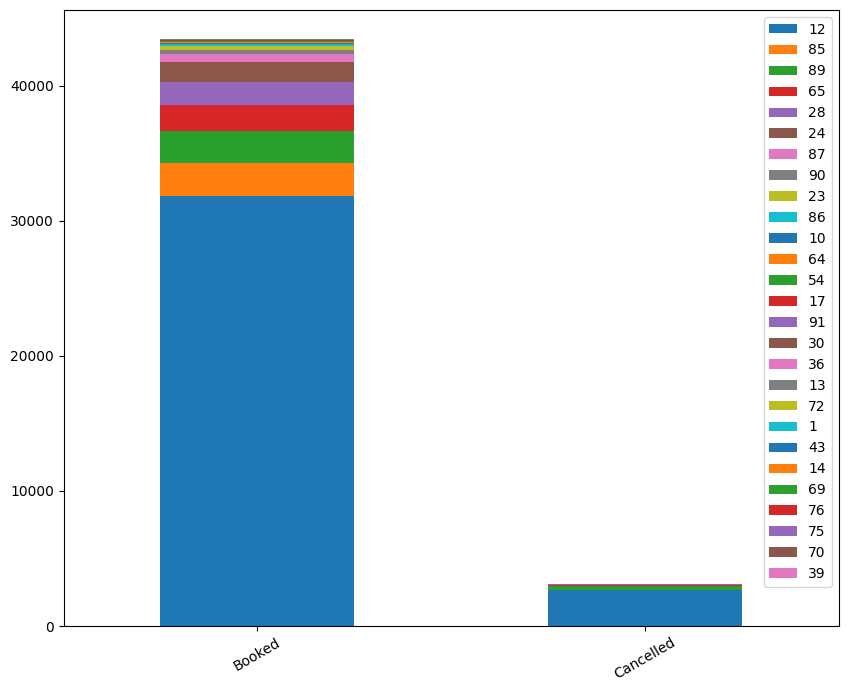

In [25]:
#Analysing vehicle_model_id
all_bookings= df['vehicle_model_id'].value_counts()
cancelled= df[target==1]['vehicle_model_id'].value_counts()
df1=pd.DataFrame([all_bookings,cancelled])
df1.index=['Booked','Cancelled']
df1.plot(kind='bar',stacked=True,figsize=(10,8))
plt.xticks(rotation=30)
plt.show()

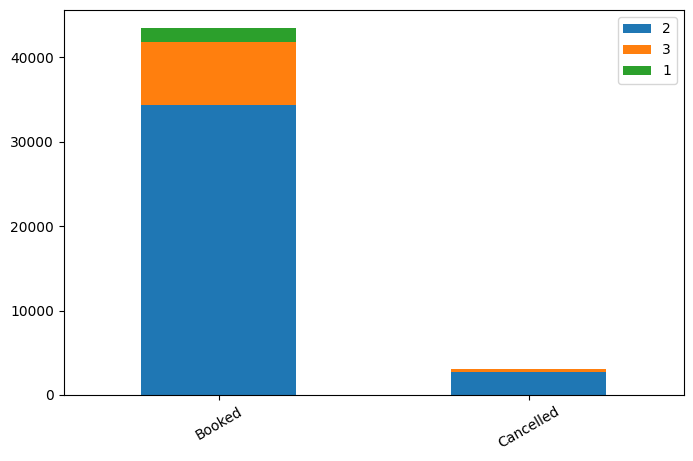

In [26]:
#Analysing travel_type_id
all_bookings= df['travel_type_id'].value_counts()
cancelled= df[target==1]['travel_type_id'].value_counts()
df1=pd.DataFrame([all_bookings,cancelled])
df1.index=['Booked','Cancelled']
df1.plot(kind='bar',stacked=True,figsize=(8,5))
plt.xticks(rotation=30)
plt.show()

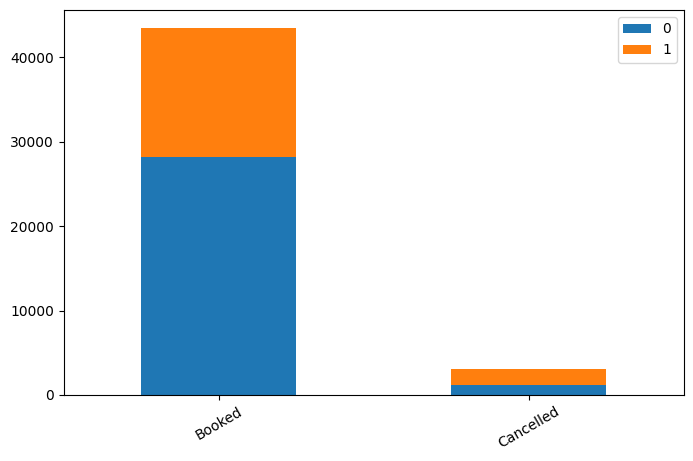

In [27]:
#Analysing online_booking
all_bookings= df['online_booking'].value_counts()
cancelled= df[target==1]['online_booking'].value_counts()
df1=pd.DataFrame([all_bookings,cancelled])
df1.index=['Booked','Cancelled']
df1.plot(kind='bar',stacked=True,figsize=(8,5))
plt.xticks(rotation=30)
plt.show()

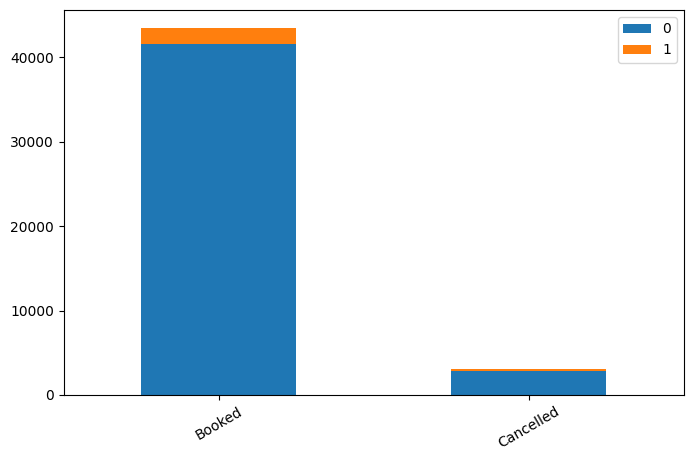

In [28]:
#Analysing mobile_site_booking
all_bookings= df['mobile_site_booking'].value_counts()
cancelled= df[target==1]['mobile_site_booking'].value_counts()
df1=pd.DataFrame([all_bookings,cancelled])
df1.index=['Booked','Cancelled']
df1.plot(kind='bar',stacked=True,figsize=(8,5))
plt.xticks(rotation=30)
plt.show()

In [29]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(df, target, test_size=0.33, random_state=0)
from sklearn.metrics import confusion_matrix as cm

In [30]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)
y_predict=clf.predict(X_test)

In [31]:
cnf_matrix = cm(Y_test, y_predict)
print(cnf_matrix)
print(clf.score(X_test,Y_test))

[[12584   736]
 [  870   143]]
0.8879508825786646


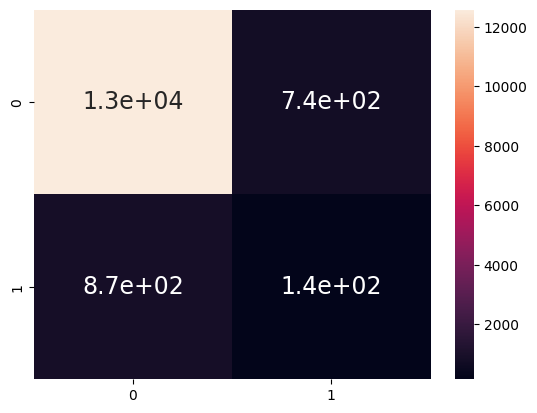

In [32]:
df_cm = pd.DataFrame(cnf_matrix, range(2), range(2))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 17})
plt.show()

In [33]:
# KNN
from sklearn.neighbors import KNeighborsClassifier as knn
neigh = knn(n_neighbors=50)
neigh.fit(X_train,Y_train)
y_predict=neigh.predict(X_test)

In [34]:
cnf_matrix1 = cm(Y_test, y_predict)
print(cnf_matrix1)
print(neigh.score(X_test,Y_test))

[[13261    59]
 [  946    67]]
0.9298820902811693


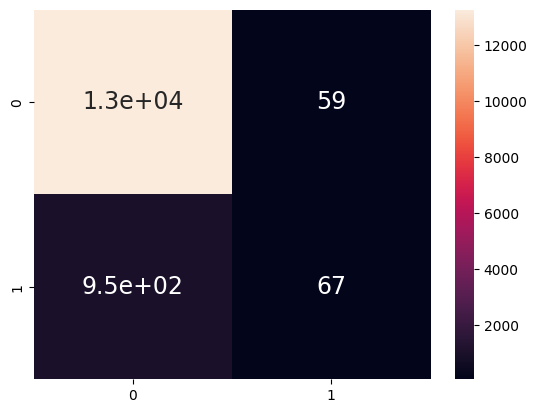

In [35]:
df_cm = pd.DataFrame(cnf_matrix1, range(2), range(2))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 17})
plt.show()

In [36]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier as dc
dtc = dc(criterion = "entropy")
dtc.fit(X_train,Y_train)
y_predict=dtc.predict(X_test)

In [37]:
cnf_matrix2 = cm(Y_test, y_predict)
print(cnf_matrix2)
print(dtc.score(X_test,Y_test))

[[12557   763]
 [  740   273]]
0.8951370962115398


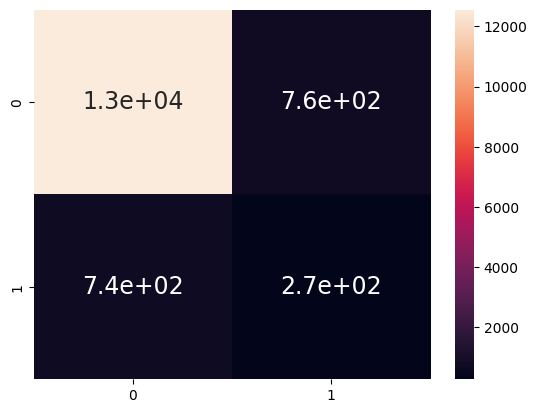

In [38]:
df_cm = pd.DataFrame(cnf_matrix2, range(2), range(2))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 17})
plt.show()

In [39]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression as LR
l = LR()
l.fit(X_train,Y_train)
y_predict = l.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
cnf_matrix3 = cm(Y_test, y_predict)
print(cnf_matrix3)
print(l.score(X_test,Y_test))

[[13315     5]
 [ 1010     3]]
0.9291843996372009


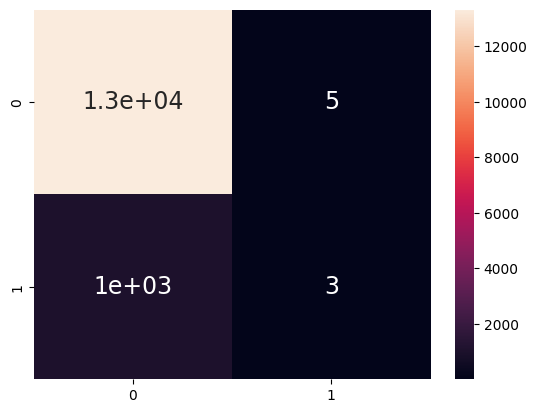

In [41]:
df_cm = pd.DataFrame(cnf_matrix3, range(2), range(2))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 17})
plt.show()

In [42]:
# RANDOM FOREST
from sklearn import ensemble
rf= ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
y_predict= rf.predict(X_test)

In [43]:
cnf_matrix4 = cm(Y_test, y_predict)
print(cnf_matrix4)
print(l.score(X_test,Y_test))

[[13050   270]
 [  851   162]]
0.9291843996372009


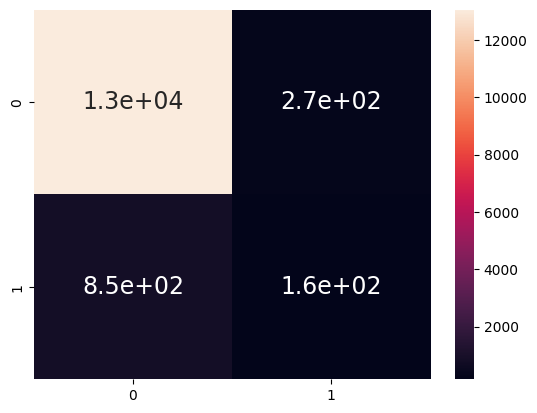

In [44]:
df_cm = pd.DataFrame(cnf_matrix4, range(2), range(2))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 17})
plt.show()